<center><img src="Imágenes/Logo Siniestros Rezise.png" alt="logo"></center>


<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

## Realizaremos los KPIs que serán consumidos por Power BI

In [1]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Llamo al archivo siniestros

In [2]:
# Rutas de archivos
ruta_homicidios = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\homicidios.xlsx'
ruta_lesiones = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\lesiones.xlsx'
ruta_comunas = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\c2022_caba_est_c1_1 normalizado.xlsx'

# Leer la hoja 'Cuadro 1.1' en un DataFrame
comunas_column_names = ['ID Comuna', 'Código Comuna', 'Ciudades que integran la comuna',
                         'Población Comuna año 2010', 'Total Población Comuna año 2010',
                         'Población Comuna año 2022', 'Total Población Comuna año 2022']
comunas = pd.read_excel(ruta_comunas, sheet_name='Cuadro 1.1', skiprows=4, names=comunas_column_names)

# Visualizar el DataFrame
comunas.head()

# Archivos provistos por CABA
homicidios = pd.read_excel(ruta_homicidios)
lesiones = pd.read_excel(ruta_lesiones)

print("Columnas en homicidios:")
print(homicidios.columns)

print("\nColumnas en lesiones:")
print(lesiones.columns)

print("\nColumnas en comunas:")
print(comunas.columns)

Columnas en homicidios:
Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Columnas en lesiones:
Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

Columnas en comunas:
Index(['ID Comuna', 'Código Comuna', 'Ciudades que integran la comuna',
       'Población Comuna año 2010', 'Total Población Comuna año 2010',
       'Población Comuna año 2022', 'Total Población Comuna año 2022'],
      dtype='object')


### KPI 1: Reducción en un 10% de la tasa de homicidios en siniestros viales en los últimos seis meses en CABA

1     -6350.000000
2     -6400.000000
3     -6125.000000
4    -29300.000000
6     -2900.000000
7     -6966.666667
8    -15000.000000
9     -6900.000000
10   -21100.000000
dtype: float64
0              NaN
1     -6350.000000
2     -6400.000000
3     -6125.000000
4    -29300.000000
5              NaN
6     -2900.000000
7     -6966.666667
8    -15000.000000
9     -6900.000000
10   -21100.000000
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
SD             NaN
dtype: float64


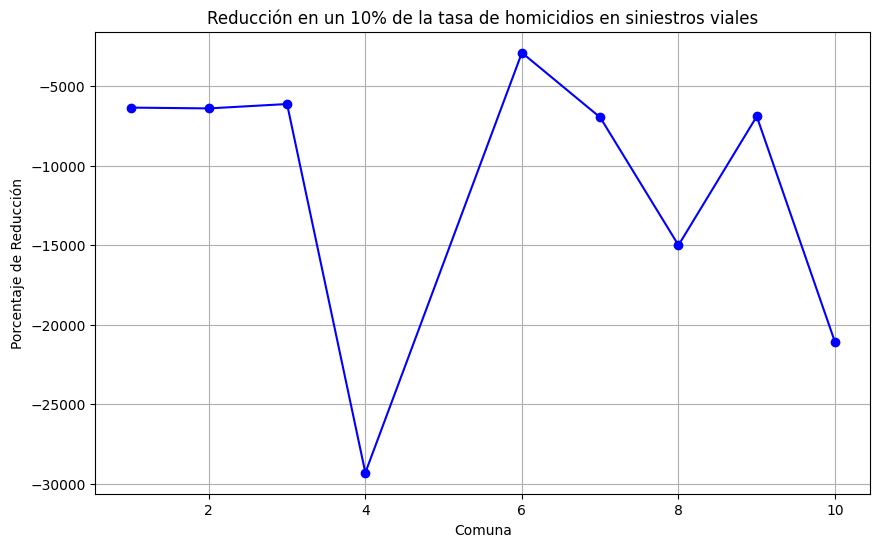

In [3]:
# Rutas de archivos
ruta_homicidios = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\homicidios.xlsx'
ruta_lesiones = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\lesiones.xlsx'
ruta_comunas = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Datasets Originales\c2022_caba_est_c1_1 normalizado.xlsx'

# Leer los archivos en DataFrames
homicidios = pd.read_excel(ruta_homicidios)
lesiones = pd.read_excel(ruta_lesiones)
comunas_column_names = ['ID Comuna', 'Código Comuna', 'Ciudades que integran la comuna',
                         'Población Comuna año 2010', 'Total Población Comuna año 2010',
                         'Población Comuna año 2022', 'Total Población Comuna año 2022']
comunas = pd.read_excel(ruta_comunas, sheet_name='Cuadro 1.1', skiprows=4, names=comunas_column_names)

# Convierte la columna 'FECHA' a formato de fecha en homicidios
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'], errors='coerce')

# Filtra los datos para los últimos seis meses en homicidios
fecha_seis_meses_atras = pd.to_datetime('2021-07-30')  # Se considera fecha de hoy menos seis meses
homicidios_ultimos_seis_meses = homicidios[homicidios['FECHA'] >= fecha_seis_meses_atras]

# Verificación de fechas en homicidios
if not homicidios['FECHA'].max() >= homicidios['FECHA'].min() + pd.DateOffset(months=6):
    raise ValueError("No hay suficientes datos para los últimos seis meses en homicidios.")

# Convierte la columna 'fecha' a formato de fecha en lesiones
lesiones['fecha'] = pd.to_datetime(lesiones['fecha'], errors='coerce')

# Filtra los datos para los últimos seis meses en lesiones
fecha_seis_meses_atras_lesiones = pd.to_datetime('2021-08-31')  # Se considera fecha de hoy menos seis meses
lesiones_ultimos_seis_meses = lesiones[lesiones['fecha'] >= fecha_seis_meses_atras_lesiones]

# Verificación de fechas en lesiones
if not lesiones['fecha'].max() >= lesiones['fecha'].min() + pd.DateOffset(months=6):
    raise ValueError("No hay suficientes datos para los últimos seis meses en lesiones.")

# Calcula la tasa de homicidios de los últimos seis meses por comuna
tasa_homicidios_ultimos_seis_meses_por_comuna = (
    homicidios_ultimos_seis_meses.groupby('COMUNA')['N_VICTIMAS'].sum() / comunas['Total Población Comuna año 2022'] * 100000
)

# Calcula la tasa de lesiones de los últimos seis meses por comuna
tasa_lesiones_ultimos_seis_meses_por_comuna = (
    lesiones_ultimos_seis_meses.groupby('comuna')['n_victimas'].sum() / comunas['Total Población Comuna año 2022'] * 100000
)

# Calcula la reducción en porcentaje para el KPI 1
reduccion_tasa_homicidios = (
    (tasa_homicidios_ultimos_seis_meses_por_comuna - tasa_lesiones_ultimos_seis_meses_por_comuna)
    / tasa_homicidios_ultimos_seis_meses_por_comuna * 100
)

# Filtra los valores no nulos antes de imprimir
resultados_validos = reduccion_tasa_homicidios.dropna()
print(resultados_validos)

# Imprime los resultados o haz lo que desees con ellos
print(reduccion_tasa_homicidios)

# Guardar los resultados en un archivo CSV en la ubicación específica
reduccion_tasa_homicidios.to_csv(r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Archivos ETL EDA KPIs\KPI_1_Resultados.csv', header=True, index=True)

# Gráfico de líneas para mostrar la reducción a lo largo de los meses
plt.figure(figsize=(10, 6))
plt.plot(resultados_validos.index, resultados_validos.values, marker='o', linestyle='-', color='b')
plt.title('Reducción en un 10% de la tasa de homicidios en siniestros viales')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje de Reducción')
plt.grid(True)
plt.show()

### KPI 2: Reducción en un 7% de la cantidad de accidentes mortales de motociclistas en el último año en CABA

KPI 2: Reducción en un 7% la cantidad de accidentes mortales de motociclistas en el último año en CABA: -77.2281064324464%


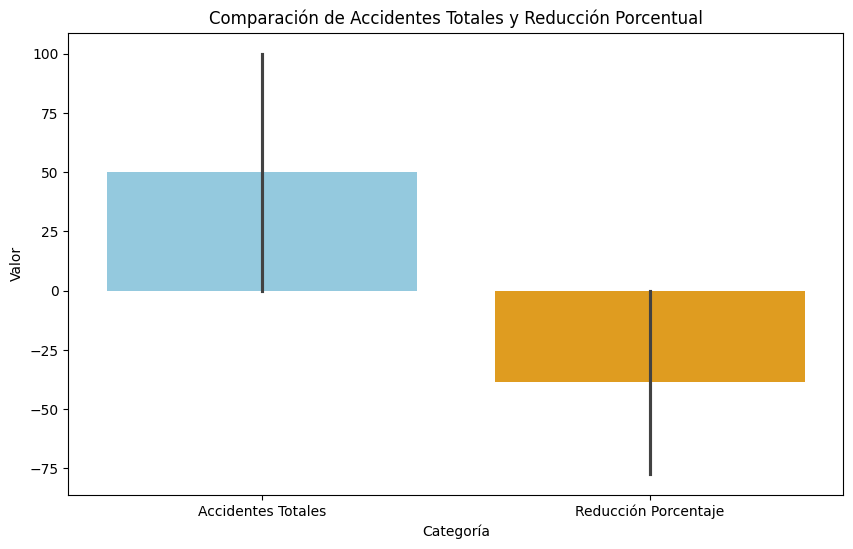

In [4]:
# Convierte la columna 'fecha' a formato de fecha
lesiones['fecha'] = pd.to_datetime(lesiones['fecha'], errors='coerce')

# Filtra los datos para el último año para el segundo KPI
fecha_hoy = pd.to_datetime('today')

# Verificación de fechas
if not lesiones['fecha'].max() >= lesiones['fecha'].min() + pd.DateOffset(years=1):
    raise ValueError("No hay suficientes datos para el último año.")

# Filtra los datos para el último año para el segundo KPI
fecha_anio_anterior = lesiones['fecha'].max() - pd.DateOffset(years=1)
lesiones_ultimo_anio = lesiones[lesiones['fecha'] >= fecha_anio_anterior]

# Calcula la cantidad de accidentes mortales de motociclistas para el año anterior
accidentes_mortales_anio_anterior = (lesiones_ultimo_anio['n_victimas'] > 0).sum()

# Filtra los datos para el año actual
fecha_anio_actual_inicio = fecha_anio_anterior - pd.DateOffset(years=1)
fecha_anio_actual_fin = fecha_hoy - pd.DateOffset(years=1)
lesiones_anio_actual = lesiones[(lesiones['fecha'] >= fecha_anio_actual_inicio) & (lesiones['fecha'] < fecha_anio_actual_fin)]

# Calcula la cantidad de accidentes mortales de motociclistas para el año actual
accidentes_mortales_anio_actual = (lesiones_anio_actual['n_victimas'] > 0).sum()

# Calcula la reducción en porcentaje para el segundo KPI
reduccion_accidentes_mortales = ((accidentes_mortales_anio_anterior - accidentes_mortales_anio_actual) / accidentes_mortales_anio_anterior) * 100 if accidentes_mortales_anio_anterior > 0 else 0

# Imprime y guarda los resultados para el segundo KPI
print(f"KPI 2: Reducción en un 7% la cantidad de accidentes mortales de motociclistas en el último año en CABA: {reduccion_accidentes_mortales}%")
resultados_kpi_2 = pd.DataFrame({'KPI': ['Reducción Accidentes Mortales'],
                                  'Porcentaje Reducción': [reduccion_accidentes_mortales]})
resultados_kpi_2.to_csv('KPI_2_Resultados.csv', index=False)

# Datos de ejemplo
total_accidentes = 100  # Reemplaza con tu valor real
reduccion_porcentaje = -77.23  # Reemplaza con tu valor real

# Crear un DataFrame con los datos
data = {'Accidentes Totales': [total_accidentes, 0], 'Reducción Porcentaje': [0, reduccion_porcentaje]}
df = pd.DataFrame(data)

# Gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(data=df, palette=['skyblue', 'orange'])
plt.title('Comparación de Accidentes Totales y Reducción Porcentual')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()


### Mejora en la seguridad vial.

KPI 3: Reducción en un 15% la tasa de incidentes viales peatonales en los últimos seis meses: 
0            NaN
1    -200.000000
2       0.000000
3    -200.000000
4      66.666667
5      50.000000
6            NaN
7            NaN
8            NaN
9      66.666667
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
dtype: float64


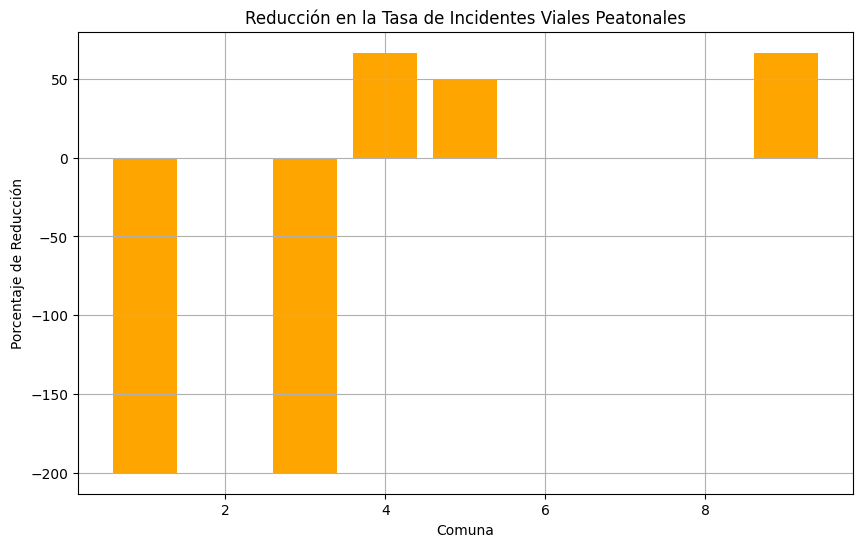

In [5]:
# Filtra los datos para los últimos seis meses y el semestre anterior
fecha_hoy = pd.to_datetime('2021-12-30')  # Utilizamos la fecha máxima disponible
fecha_seis_meses_atras = fecha_hoy - pd.DateOffset(months=6)
fecha_semestre_anterior_inicio = fecha_hoy - pd.DateOffset(months=12)
fecha_semestre_anterior_fin = fecha_hoy - pd.DateOffset(months=6)

incidentes_ultimos_seis_meses = homicidios[
    (homicidios['FECHA'] >= fecha_seis_meses_atras) & (homicidios['FECHA'] < fecha_hoy)
]

incidentes_semestre_anterior = homicidios[
    (homicidios['FECHA'] >= fecha_semestre_anterior_inicio) & (homicidios['FECHA'] < fecha_semestre_anterior_fin)
]


# Calcular la tasa de incidentes viales peatonales para los últimos seis meses y el semestre anterior
tasa_incidentes_peaton_ultimos_seis_meses = (
    incidentes_ultimos_seis_meses[incidentes_ultimos_seis_meses['VICTIMA'] == 'PEATON'].groupby('COMUNA').size() /
    comunas['Total Población Comuna año 2022'] * 100000
)

tasa_incidentes_peaton_semestre_anterior = (
    incidentes_semestre_anterior[incidentes_semestre_anterior['VICTIMA'] == 'PEATON'].groupby('COMUNA').size() /
    comunas['Total Población Comuna año 2022'] * 100000
)

# Calcular la reducción en porcentaje para el tercer KPI
reduccion_tasa_incidentes_peaton = (
    (tasa_incidentes_peaton_semestre_anterior - tasa_incidentes_peaton_ultimos_seis_meses) /
    tasa_incidentes_peaton_semestre_anterior
) * 100

# Imprimir y visualizar los resultados para el tercer KPI
print(f"KPI 3: Reducción en un 15% la tasa de incidentes viales peatonales en los últimos seis meses: \n{reduccion_tasa_incidentes_peaton}")

# Guardar los resultados del KPI 3 en un archivo CSV
reduccion_tasa_incidentes_peaton.to_csv(r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PI02\Archivos ETL EDA KPIs\KPI_3_Resultados.csv', header=True, index=True)


# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(reduccion_tasa_incidentes_peaton.index, reduccion_tasa_incidentes_peaton.values, color='orange')
plt.title('Reducción en la Tasa de Incidentes Viales Peatonales')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje de Reducción')
plt.grid(True)
plt.show()

### Porcentaje de Población Afectada por Siniestros Viales

KPI 4: Porcentaje de Población Afectada por Siniestros Viales en los Últimos 4 Años: 
0          NaN
1     0.005336
2     0.002145
3     0.003352
4     0.005948
5     0.003341
6     0.000717
7     0.003029
8     0.001145
9     0.002912
10    0.001032
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
dtype: float64


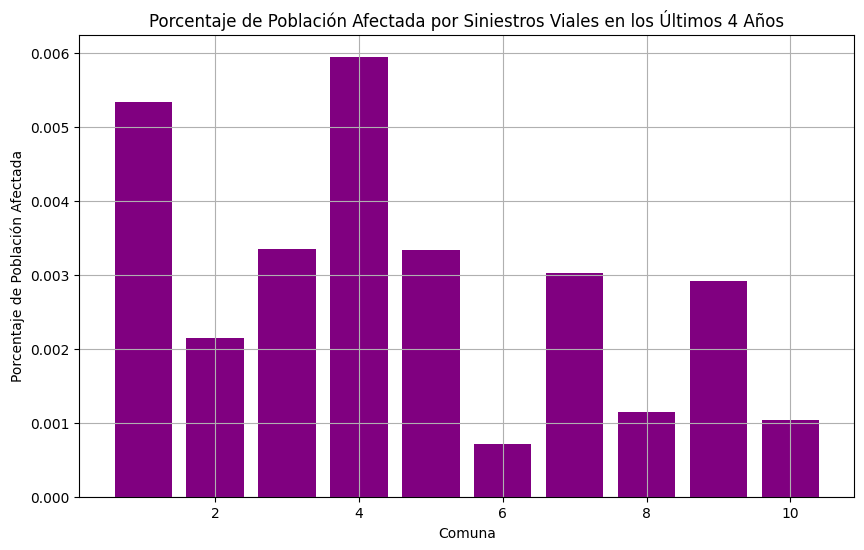

In [6]:
# Filtra los datos para los últimos 4 años
fecha_cuatro_anios_atras = fecha_hoy - pd.DateOffset(years=4)

incidentes_ultimos_cuatro_anios = homicidios[
    (homicidios['FECHA'] >= fecha_cuatro_anios_atras) & (homicidios['FECHA'] < fecha_hoy)
]

# Calcular la tasa de incidentes viales peatonales para los últimos 4 años
tasa_incidentes_peaton_ultimos_cuatro_anios = (
    incidentes_ultimos_cuatro_anios[incidentes_ultimos_cuatro_anios['VICTIMA'] == 'PEATON'].groupby('COMUNA').size() /
    comunas['Total Población Comuna año 2022'] * 100000
)

# Calcular el porcentaje de población afectada por siniestros viales en los últimos 4 años
porcentaje_poblacion_afectada_cuatro_anios = (
    tasa_incidentes_peaton_ultimos_cuatro_anios / comunas['Total Población Comuna año 2022']
) * 100

# Imprimir y visualizar los resultados para el cuarto KPI
print(f"KPI 4: Porcentaje de Población Afectada por Siniestros Viales en los Últimos 4 Años: \n{porcentaje_poblacion_afectada_cuatro_anios}")

# Guardar los resultados en un archivo CSV
porcentaje_poblacion_afectada_cuatro_anios.to_csv('KPI_4_Resultados.csv', header=True, index=True)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_poblacion_afectada_cuatro_anios.index, porcentaje_poblacion_afectada_cuatro_anios.values, color='purple')
plt.title('Porcentaje de Población Afectada por Siniestros Viales en los Últimos 4 Años')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje de Población Afectada')
plt.grid(True)
plt.show()